<a href="https://colab.research.google.com/github/AzrielFirmansyah/ProjectDeepLearning/blob/main/ArtStyleTransfer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-hub

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [3]:
# Load the style transfer model from TensorFlow Hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [4]:
def load_image(image_path):
    """Load and preprocess an image."""
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.expand_dims(img, axis=0)  # Add batch dimension
    return img

def stylize_image(content_image_path, style_image_path):
    """Apply style transfer to an image."""
    content_image = load_image(content_image_path)
    style_image = load_image(style_image_path)

    # Perform style transfer
    stylized_image = hub_module(content_image, style_image)[0]

    return stylized_image

In [5]:
def display_images(content_image_path, style_image_path, stylized_image):
    """Display content, style, and stylized images."""
    content_img = load_image(content_image_path)
    style_img = load_image(style_image_path)

    plt.figure(figsize=(12, 12))

    plt.subplot(1, 3, 1)
    plt.title('Content Image')
    plt.imshow(tf.squeeze(content_img))

    plt.subplot(1, 3, 2)
    plt.title('Style Image')
    plt.imshow(tf.squeeze(style_img))

    plt.subplot(1, 3, 3)
    plt.title('Stylized Image')
    plt.imshow(tf.squeeze(stylized_image))

    plt.show()

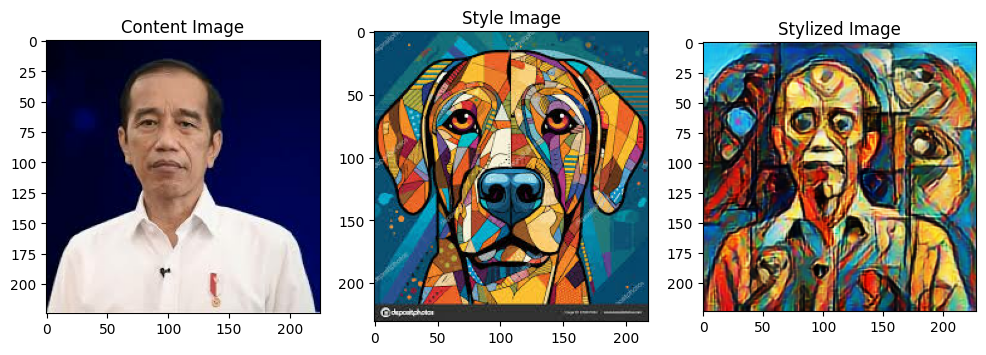

In [8]:
# Example usage
content_path = '/path/content/Jkw.jpeg'
style_path = '/path/content/images.jpeg'
stylized_result = stylize_image(content_path, style_path)
display_images(content_path, style_path, stylized_result)